# Supervised Learning
This Notebook Trains Supervised Learning Models (Logistic Regression, Decision Trees, Random Forest, SVM) for classification.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## 1. Load the feature selected dataset

In [2]:
df = pd.read_csv("../data/selected_feature_heart_disease.csv")

X = df.drop("target", axis=1)
y = df["target"]

## 2. Split the dataset into training (80%) and testing (20%) sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Train and Evaluate Models

### Helper function for evaluating models

In [4]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"=== {name} Evaluation ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_proba))
    print()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr, tpr):.2f})")

    return model

=== Logistic Regression Evaluation ===
Accuracy: 0.9166666666666666
Precision: 0.9523809523809523
Recall: 0.8333333333333334
F1 Score: 0.8888888888888888
AUC Score: 0.9652777777777778

=== Decision Tree Evaluation ===
Accuracy: 0.9
Precision: 0.9090909090909091
Recall: 0.8333333333333334
F1 Score: 0.8695652173913043
AUC Score: 0.9276620370370371

=== Random Forest Evaluation ===
Accuracy: 0.8833333333333333
Precision: 0.8695652173913043
Recall: 0.8333333333333334
F1 Score: 0.851063829787234
AUC Score: 0.9479166666666667

=== SVM Evaluation ===
Accuracy: 0.9
Precision: 0.8461538461538461
Recall: 0.9166666666666666
F1 Score: 0.88
AUC Score: 0.9513888888888888



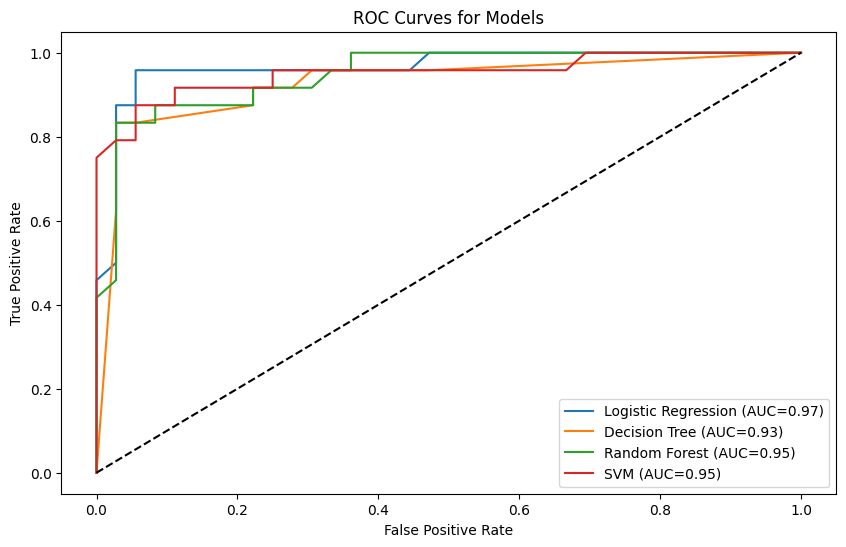

In [5]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

plt.figure(figsize=(10, 6))

trained_models = {}
for name, clf in models.items():
    trained_models[name] = evaluate_model(name, clf, X_train, X_test, y_train, y_test)

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend()
plt.show()